# Decoding Dissatisfaction: A Comparative Analysis of Employee Resignations at DETE and TAFE

## Introduction

This project aims to analyze employee resignation data from DETE and TAFE to understand factors influencing employee dissatisfaction. The focus is on examining how dissatisfaction varies with employee tenure, employment status, gender, and age. By combining and cleaning data from both institutions, the goal is to uncover significant trends and differences in employee satisfaction.

### Approach

The analysis involved several steps: first, data cleaning to address missing values and standardize columns; then, the creation of new variables to categorize employee service and dissatisfaction levels. Pivot tables were generated to calculate dissatisfaction rates across various categories, followed by visualizations to highlight key findings. The analysis indicates that DETE employees experience higher dissatisfaction compared to those at TAFE, with notable variations in dissatisfaction rates across different employment statuses and age groups.

### Key Results

The key findings include a higher overall dissatisfaction rate at DETE compared to TAFE. Additionally, dissatisfaction levels vary across different employment statuses, with full-time and part-time employees reporting higher dissatisfaction rates compared to contract/casual workers. Age-wise, dissatisfaction increases with age, highlighting the need for targeted interventions to improve employee satisfaction across different demographics.

In [1]:
import numpy as np
import pandas as pd

# Set pandas display option to show all rows when displaying dataframes
pd.set_option('display.max_rows', None)

# Load the DETE survey dataset
# Define 'na_values' to standardize different representations of missing data
dete_survey = pd.read_csv('dete_survey.csv', 
                          na_values=['NONE', 'none', 'n/a', 'nan', 'Not Stated', '-'])

# Load the TAFE survey dataset
# Define 'na_values' to handle various missing data indicators consistently
tafe_survey = pd.read_csv('tafe_survey.csv',
                          na_values=['NONE', 'none', 'n/a', 'nan', 'Not Stated', '-'])

def explore(df):
    """
    Function to explore datasets:
    - Display information about the DataFrame
    - Show the first few rows
    - Provide basic statistics
    - Show the null values for each column
    """
    print("Data Overview:")
    print(df.info())  # Print information about DataFrame including data types and non-null counts
    
    print("\nFirst few rows of the dataset:")
    print(df.head())  # Display the first 5 rows to get a sense of the data
    
    print("\nBasic statistics:")
    print(df.describe())  # Show basic statistical details of the numerical columns
    
    print("\nNull values:")
    print(df.isnull().sum())  # Show the null values for each column

In [2]:
explore(dete_survey)

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to pr

## Dataset Introduction: DETE Survey

The `dete_survey` dataset contains exit survey responses from employees of the Department of Education, Training and Employment (DETE). This dataset includes various columns that capture information about the employees' reasons for leaving, their employment history, and other relevant details. 

### Key Columns:
- **ID**: Unique identifier for each survey participant.
- **SeparationType**: The reason why the person's employment ended.
- **Cease Date**: The date or year when the person's employment ended.
- **DETE Start Date**: The year the person began employment with DETE.
- **Position**: The job position held by the employee.
- **Region**: The region where the employee worked.
- **Gender**: Gender of the employee.
- **Age**: Age of the employee.

### Data Exploration Observations

Upon exploring the `dete_survey` dataset, we observed the following:

1. **Data Overview**:
   - The dataset contains 822 entries and 56 columns.
   - The columns include a mix of data types: integers, floats, booleans, and objects (strings).

2. **Missing Values**:
   - Several columns have missing values, which is critical for data analysis:
     - **Cease Date**: 34 missing values.
     - **DETE Start Date**: 73 missing values.
     - **Role Start Date**: 98 missing values.
     - **Position**: 5 missing values.
     - **Classification**: 367 missing values.
     - **Region**: 105 missing values.
     - Additional columns like `Aboriginal`, `Torres Strait`, `South Sea`, `Disability`, and `NESB` have extensive missing values, indicating that these might be less populated or less relevant for the current analysis.

3. **Null Value Representation**:
   - To address various representations of missing values such as 'nan', '-', and other non-standard entries, the `na_values` parameter was used in the `pd.read_csv` method to standardize these entries as NaN.

In [3]:
explore(tafe_survey)

Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                   

## Dataset Introduction: TAFE Survey

The `tafe_survey` dataset comprises exit survey responses from employees of the Technical and Further Education (TAFE) institute in Queensland. This dataset captures various aspects of employee experience, including reasons for leaving, the length of service, and responses to specific workplace conditions.

### Key Columns:
- **Record ID**: Unique identifier for each survey participant.
- **Institute**: The specific TAFE institute where the employee worked.
- **WorkArea**: The work area or department of the employee.
- **CESSATION YEAR**: The year the employee's employment ended.
- **Reason for ceasing employment**: The reason given for leaving the institute.
- **LengthofServiceOverall**: Total length of service at the institute (in years).
- **CurrentAge**: Age of the employee at the time of the survey.
- **Gender**: Gender of the employee.

### Data Exploration Observations

Upon exploring the `tafe_survey` dataset, the following observations were made:

1. **Data Overview**:
   - The dataset consists of 702 entries and 72 columns.
   - Columns include a mix of numerical and categorical data types.

2. **Missing Values**:
   - Several columns have missing values:
     - **CESSATION YEAR**: 7 missing values.
     - **Reason for ceasing employment**: 1 missing value.
     - **Contributing Factors**: Many columns have substantial missing data, ranging from 17 to 685 missing values.
     - **Main Factor**: 113 missing values.
     - **InstituteViews and WorkUnitViews**: Numerous columns have missing values, with counts ranging from 93 to 646.
     - **InductionInfo**: Several columns related to induction have missing data, with some columns having no responses.
   
3. **Null Value Representation**:
   - To address various representations of missing values such as 'nan', '-', and other non-standard entries, the `na_values` parameter was used in the `pd.read_csv` method to standardize these entries as NaN.

In [4]:
# Drop unnecessary columns from the DETE survey dataset
# Columns 28 to 48 are dropped, as they contain less relevant information for our analysis
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

# Drop unnecessary columns from the TAFE survey dataset
# Columns 17 to 65 are dropped to focus on the relevant data for our analysis
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

## Data Cleaning: Dropping Unnecessary Columns

During the data cleaning process, several columns from the `dete_survey` and `tafe_survey` datasets were identified as irrelevant for our analysis. To streamline the datasets and focus on the pertinent information, the following columns were dropped:

### dete_survey Dataset

**Dropped Columns:**
- Columns from index 28 to 48 (inclusive), which correspond to columns related to various aspects of employee feedback, professional development, and other detailed survey responses.

**Reason for Dropping:**
- These columns were removed because they either contained redundant information or were not directly relevant to our analysis goals. By eliminating these columns, we reduce the complexity of the dataset and focus on the core variables that contribute to understanding employee separation and related factors.

### tafe_survey Dataset

**Dropped Columns:**
- Columns from index 17 to 65 (inclusive), which include various detailed responses and factors related to employee feedback, induction processes, and workplace conditions.

**Reason for Dropping:**
- These columns were deemed non-essential for the core analysis. They include extensive details on induction processes, feedback, and other factors that do not directly contribute to the primary objectives of the analysis. Removing these columns helps simplify the dataset and ensures that the focus remains on the critical aspects of employee exit reasons and related survey responses.


In [5]:
# Clean and standardize column names in the dete_survey_updated DataFrame
dete_survey_updated.columns = (
    dete_survey_updated.columns
    .str.replace('\s+', ' ')       # Replace multiple spaces with a single space
    .str.replace(' ', '_')         # Replace spaces with underscores
    .str.strip()                   # Remove leading and trailing spaces
    .str.replace('/', '_')         # Replace slashes with underscores
    .str.lower()                   # Convert all column names to lowercase
)

# Define a mapping of old column names to new, more descriptive column names for the tafe_survey_updated DataFrame
tafe_mapping = {
    'Record ID': 'id',                                                   # Unique identifier for each record
    'CESSATION YEAR': 'cease_date',                                       # Year when employment ceased
    'Reason for ceasing employment': 'separationtype',                    # Reason for leaving the job
    'Gender. What is your Gender?': 'gender',                             # Gender of the respondent
    'CurrentAge. Current Age': 'age',                                     # Current age of the respondent
    'Employment Type. Employment Type': 'employment_status',              # Type of employment status
    'Classification. Classification': 'position',                         # Job classification or position
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', # Total years of service at the institute
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service',   # Years of service at the current workplace
    'Contributing Factors. Dissatisfaction': 'dissatisfaction',           # Indicator of contributing factor dissatisfaction
    'Contributing Factors. Job Dissatisfaction': 'job_dissatisfaction'    # Indicator of contributing factor job dissatisfaction
}

# Rename columns in the tafe_survey_updated DataFrame according to the tafe_mapping dictionary
tafe_survey_updated = tafe_survey_updated.rename(columns=tafe_mapping)

## Column Renaming and Cleaning

In this section, several key updates were made to the column names in both datasets to improve consistency and readability for subsequent analysis:

### Changes in dete_survey_updated

The column names in the `dete_survey_updated` dataset were cleaned and standardized with the following steps:
1. **Whitespace Removal:** Extra spaces within column names were removed.
2. **Capitalization Standardization:** All column names were converted to lowercase to ensure uniformity.
3. **Special Character Replacement:** Slashes ('/') in column names were replaced with underscores ('_') for consistency.

### Changes in tafe_survey_updated

For the `tafe_survey_updated` dataset, several columns were renamed to align with more intuitive names. 

In [6]:
# Display unique values in the 'separationtype' column
# This helps us understand the different categories of separation types available in the dataset
print(dete_survey_updated['separationtype'].unique())

# Display the count of each unique value in the 'separationtype' column
# This provides a frequency distribution of the different separation types, helping us to see how common each type is
print('\n', dete_survey_updated['separationtype'].value_counts())

['Ill Health Retirement' 'Voluntary Early Retirement (VER)'
 'Resignation-Other reasons' 'Age Retirement' 'Resignation-Other employer'
 'Resignation-Move overseas/interstate' 'Other' 'Contract Expired'
 'Termination']

 separationtype
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: count, dtype: int64


In [7]:
# Filter the dete_survey_updated DataFrame to include only rows 
# where the 'separationtype' is one of the resignation types
dete_resignations = dete_survey_updated.loc[dete_survey_updated['separationtype'].isin([
    'Resignation-Other reasons',
    'Resignation-Other employer',
    'Resignation-Move overseas/interstate'])].copy()

In [8]:
# Display the unique values in the 'separationtype' column of the tafe_survey_updated DataFrame
# This helps to understand the different categories present in the 'separationtype' column
print(tafe_survey_updated['separationtype'].unique())

# Print the count of each unique value in the 'separationtype' column
# This provides a frequency distribution of the separation types, helping to identify the most common reasons for separation
print('\n', tafe_survey_updated['separationtype'].value_counts())

['Contract Expired' 'Retirement' 'Resignation' 'Retrenchment/ Redundancy'
 'Termination' 'Transfer' nan]

 separationtype
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64


In [9]:
# Filter the tafe_survey_updated DataFrame to include only rows
# where the 'separationtype' is 'Resignation'
tafe_resignations = tafe_survey_updated.loc[tafe_survey_updated['separationtype'] == 'Resignation']

## Filtering Survey Data for Resignations

In this analysis, we focus exclusively on survey respondents who resigned from their positions. To achieve this, I filtered the datasets to include only those entries where the separation type indicates resignation.

### dete_survey_updated DataFrame
For the `dete_survey_updated` DataFrame, I identified several separation types that indicate resignation:
- `Resignation-Other reasons`
- `Resignation-Other employer`
- `Resignation-Move overseas/interstate`

### tafe_survey_updated DataFrame
In the `tafe_survey_updated` DataFrame, the separation type indicating resignation is simply labeled as Resignation. The separation type column here is more straightforward, with a single category for resignation.

### Summary
By filtering the datasets to include only respondents who resigned, we can focus our analysis on the factors influencing resignation and exclude other types of separations. This targeted approach will help in obtaining more relevant insights related to resignation trends.

In [10]:
dete_resignations['cease_date'].value_counts(dropna=False)

cease_date
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2012      1
2010         1
07/2006      1
Name: count, dtype: int64

In [11]:
# Extract the last 4 characters from 'cease_date' which represent the year
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.slice(-4)

# Convert the 'cease_date' column to numeric
dete_resignations['cease_date'] = pd.to_numeric(dete_resignations['cease_date'], errors='coerce')

dete_resignations['cease_date'].value_counts().sort_index()

cease_date
2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: count, dtype: int64

In [12]:
# Check for any rows where 'dete_start_date' is below 1940, which would be illogical
dete_resignations.loc[dete_resignations['dete_start_date'] < 1940]

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb


In [13]:
# Check for any rows where 'dete_start_date' is greater than 'cease_date', which is also illogical
dete_resignations.loc[dete_resignations['dete_start_date'] > dete_resignations['cease_date']]

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb


## Logical Consistency Checks

- **Year Consistency Check:** I checked for any rows where the 'dete_start_date' was below 1940. This is because start dates earlier than 1940 would be considered outliers or errors in the dataset. Fortunately, no rows met this criterion, indicating that all start dates are within a reasonable range.
  
- **Start Date vs. Cease Date Check:** I verified that there were no rows where 'dete_start_date' was greater than 'cease_date'. This check is crucial because it would be illogical for an employee to start after their resignation. Again, the absence of such rows confirms that the data is consistent and aligns with logical expectations for the analysis.

In [14]:
tafe_resignations['cease_date'].value_counts().sort_index()

cease_date
2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: count, dtype: int64

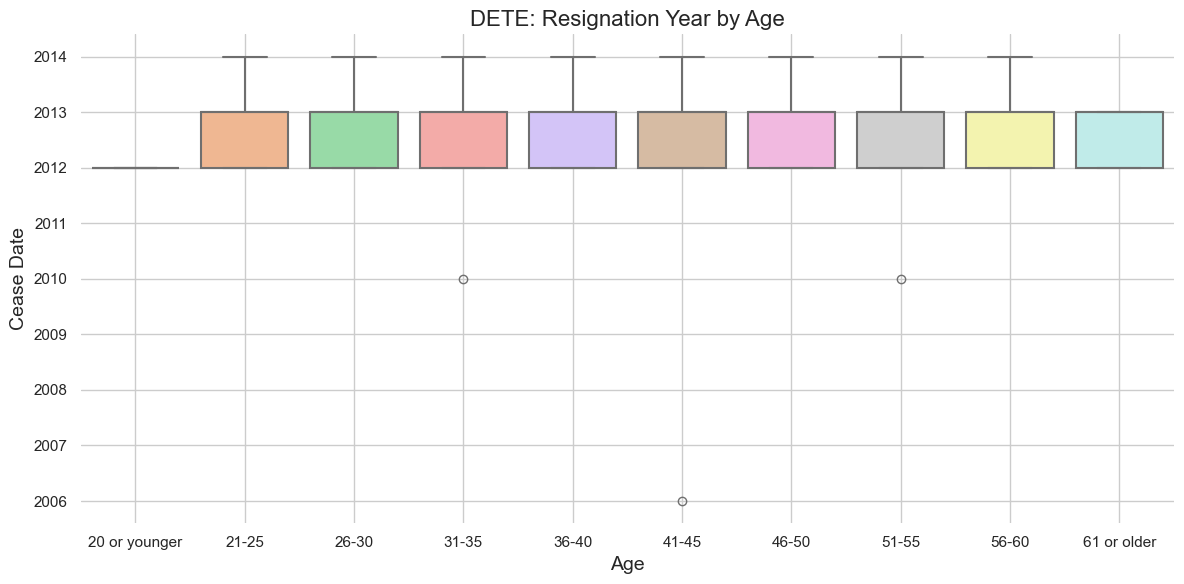

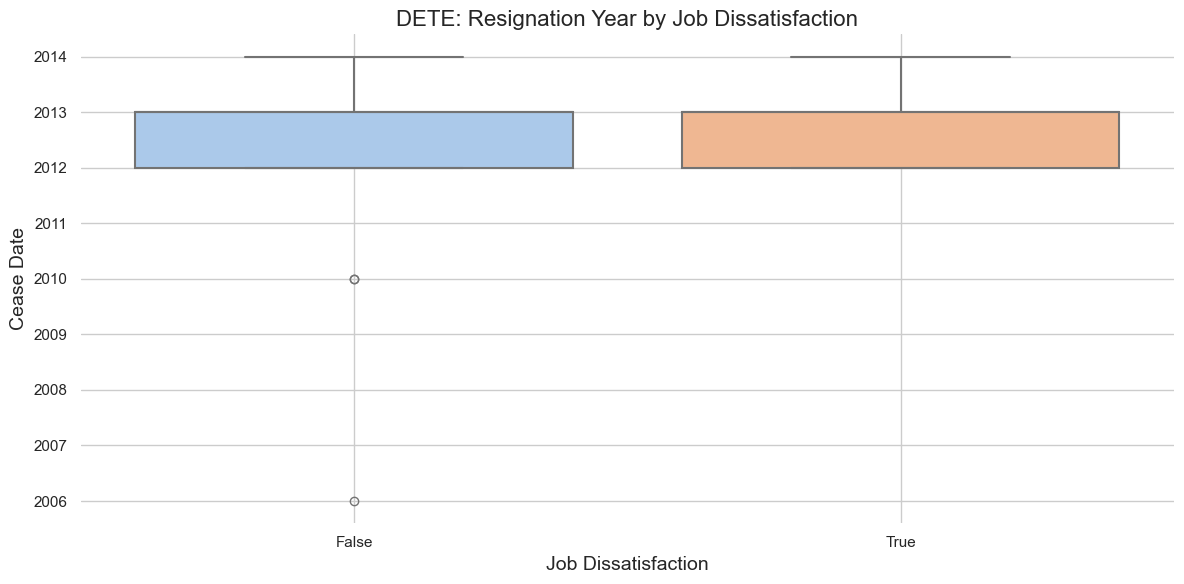

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the boxplot for 'cease_date' by 'age'
plt.figure(figsize=(12, 6))
ax1 = sns.boxplot(x='age', 
                  y='cease_date', 
                  data=dete_resignations.sort_values('age'), 
                  linewidth=1.5, 
                  hue='age', 
                  palette=sns.color_palette("pastel"),
                  legend=False)
ax1.set_title('DETE: Resignation Year by Age', fontsize=16)
ax1.set_xlabel('Age', fontsize=14)
ax1.set_ylabel('Cease Date', fontsize=14)
plt.grid(True)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# Create the boxplot for 'cease_date' by 'job_dissatisfaction'
plt.figure(figsize=(12, 6))
ax2 = sns.boxplot(x='job_dissatisfaction', 
                  y='cease_date', 
                  data=dete_resignations, 
                  linewidth=1.5, 
                  hue='job_dissatisfaction',
                  palette=sns.color_palette("pastel", n_colors=2), 
                  legend=False)
ax2.set_title('DETE: Resignation Year by Job Dissatisfaction', fontsize=16)
ax2.set_xlabel('Job Dissatisfaction', fontsize=14)
ax2.set_ylabel('Cease Date', fontsize=14)
plt.grid(True)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [16]:
# Filter the dataset to include only rows where 'cease_date' is 2012 or later
dete_resignations_cleaned = dete_resignations[dete_resignations['cease_date'] >= 2012]
dete_resignations_cleaned = dete_resignations_cleaned.reset_index(drop=True)

In [17]:
dete_resignations_cleaned.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
1,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
2,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
3,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
4,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


## Boxplots Analysis and Outlier Handling

### Boxplots Analysis

Two boxplots were generated to explore the distribution of the `cease_date` column from the `dete_resignations` dataset, in relation to key variables:

1. **Resignation Year by Age**
2. **Resignation Year by Job Dissatisfaction**

The boxplots provide a visual summary of the resignation years across different ages and job dissatisfaction levels, highlighting the central tendency, spread, and potential outliers in the data.

### Observations

- During the analysis of the boxplots, several dots indicating potential outliers were observed. Specifically, the `cease_date` column showed a limited number of data points from years before 2012. The value counts revealed that there are a few entries for the years 2006 and 2010, which are substantially lower compared to other years such as 2012 and 2013. These outliers could potentially skew the analysis and affect the accuracy of insights drawn from the data.
- To ensure the robustness of the analysis and avoid the influence of these outliers, I decided to filter out data points with `cease_date` values before 2012. This approach will help in focusing on more recent and relevant data, providing clearer insights into trends and patterns without the distortion caused by extreme values.

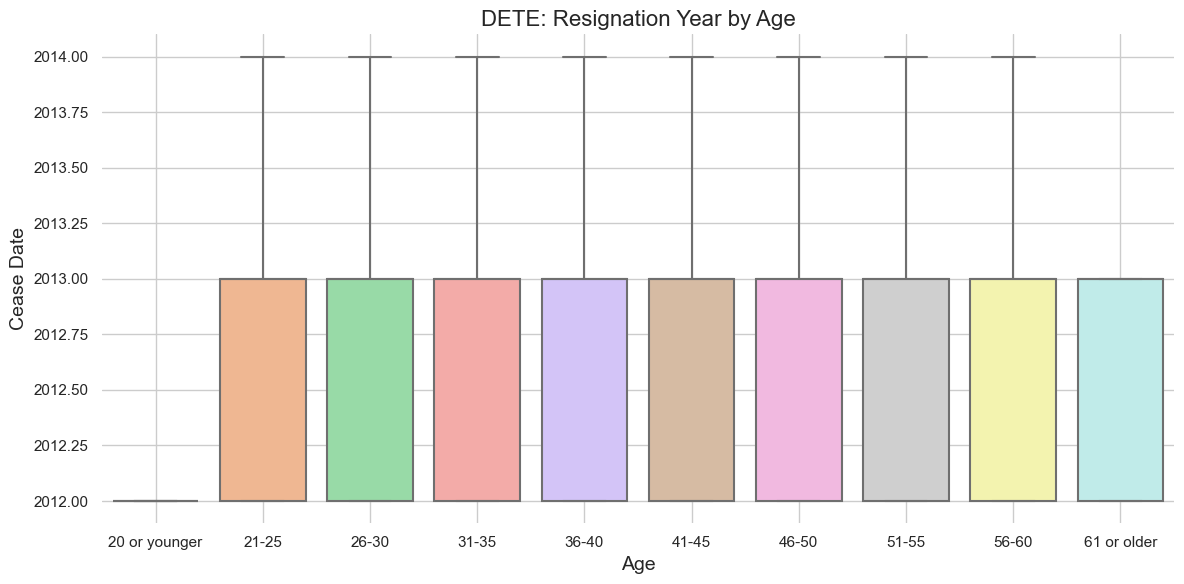

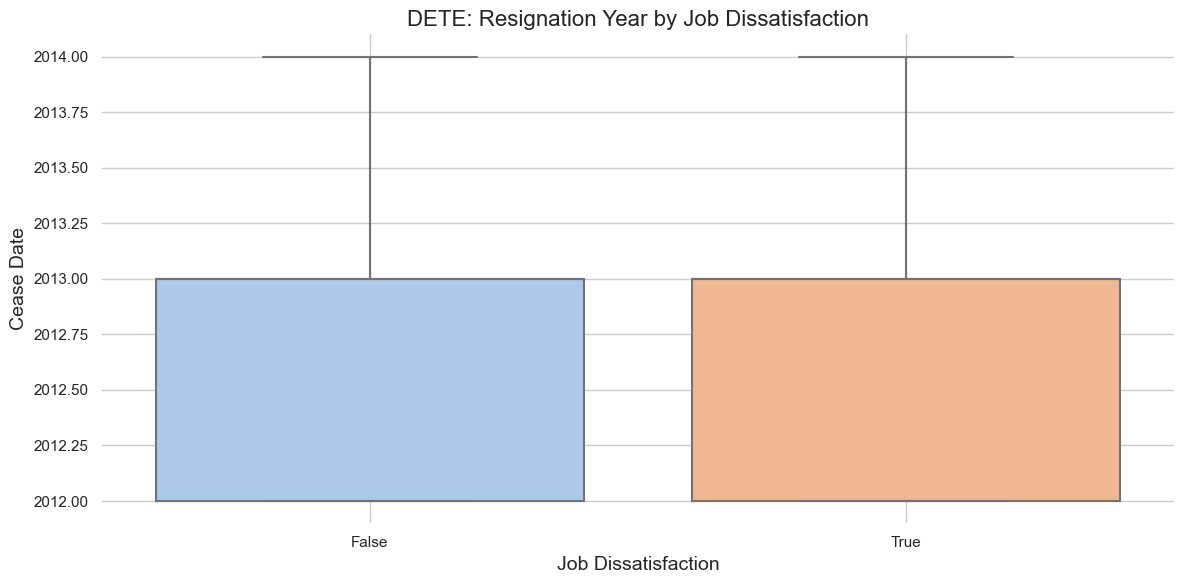

In [18]:
# Create the boxplot for 'cease_date' by 'age'
plt.figure(figsize=(12, 6))
ax1 = sns.boxplot(x='age', 
                  y='cease_date', 
                  data=dete_resignations_cleaned.sort_values('age'), 
                  linewidth=1.5, 
                  hue='age', 
                  palette=sns.color_palette("pastel"), 
                  legend=False)
ax1.set_title('DETE: Resignation Year by Age', fontsize=16)
ax1.set_xlabel('Age', fontsize=14)
ax1.set_ylabel('Cease Date', fontsize=14)
plt.grid(True)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# Create the boxplot for 'cease_date' by 'job_dissatisfaction'
plt.figure(figsize=(12, 6))
ax2 = sns.boxplot(x='job_dissatisfaction', 
                  y='cease_date', 
                  data=dete_resignations_cleaned, 
                  linewidth=1.5, 
                  hue='job_dissatisfaction',
                  palette=sns.color_palette("pastel", n_colors=2),
                  legend=False)
ax2.set_title('DETE: Resignation Year by Job Dissatisfaction', fontsize=16)
ax2.set_xlabel('Job Dissatisfaction', fontsize=14)
ax2.set_ylabel('Cease Date', fontsize=14)
plt.grid(True)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

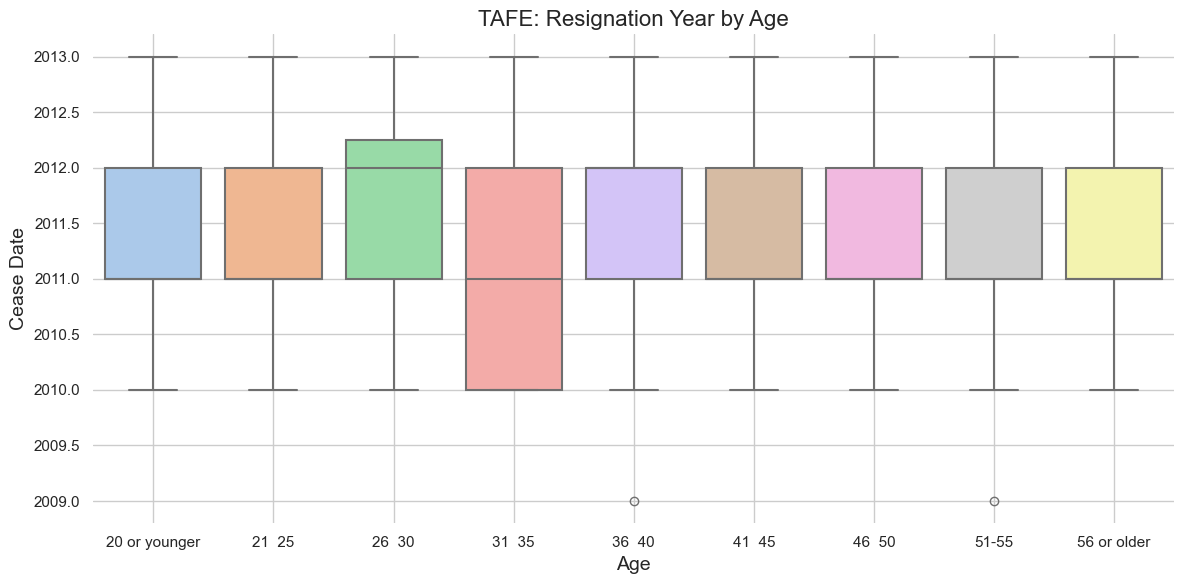

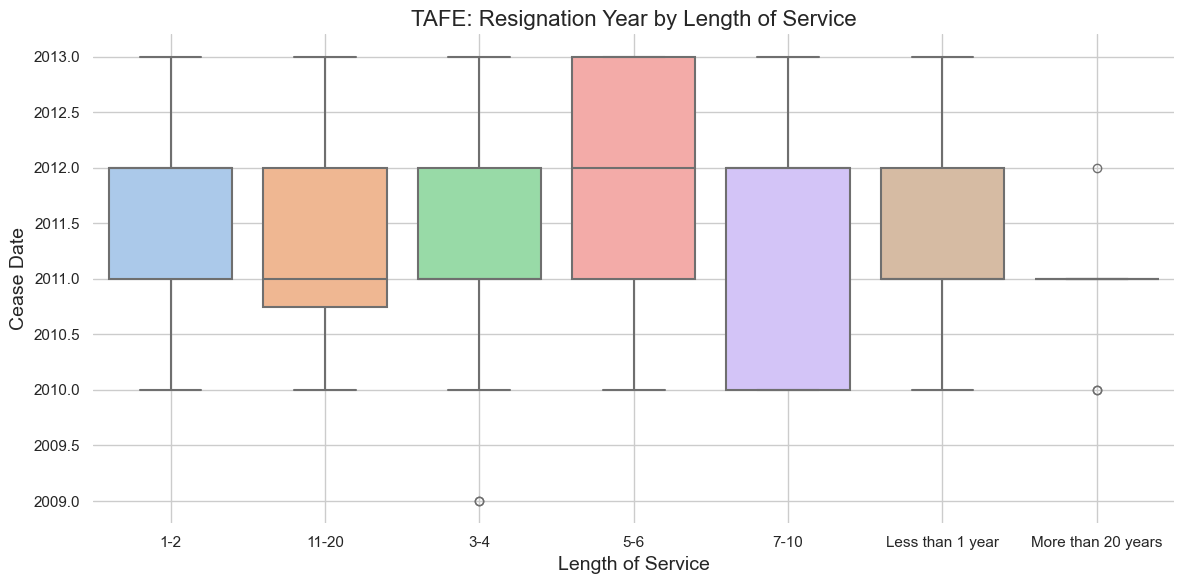

In [19]:
# Create the boxplot for 'cease_date' by 'age'
plt.figure(figsize=(12, 6))
ax1 = sns.boxplot(x='age', 
                  y='cease_date', 
                  data=tafe_resignations.sort_values('age'), 
                  linewidth=1.5, 
                  hue='age', 
                  palette=sns.color_palette("pastel", n_colors=9), 
                  legend=False)
ax1.set_title('TAFE: Resignation Year by Age', fontsize=16)
ax1.set_xlabel('Age', fontsize=14)
ax1.set_ylabel('Cease Date', fontsize=14)
plt.grid(True)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# Create the boxplot for 'cease_date' by 'institute_service'
plt.figure(figsize=(12, 6))
ax1 = sns.boxplot(x='institute_service', 
                  y='cease_date', 
                  data=tafe_resignations.sort_values('institute_service'), 
                  linewidth=1.5, 
                  hue='institute_service', 
                  palette=sns.color_palette("pastel", n_colors=7), 
                  legend=False)
ax1.set_title('TAFE: Resignation Year by Length of Service', fontsize=16)
ax1.set_xlabel('Length of Service', fontsize=14)
ax1.set_ylabel('Cease Date', fontsize=14)
plt.grid(True)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

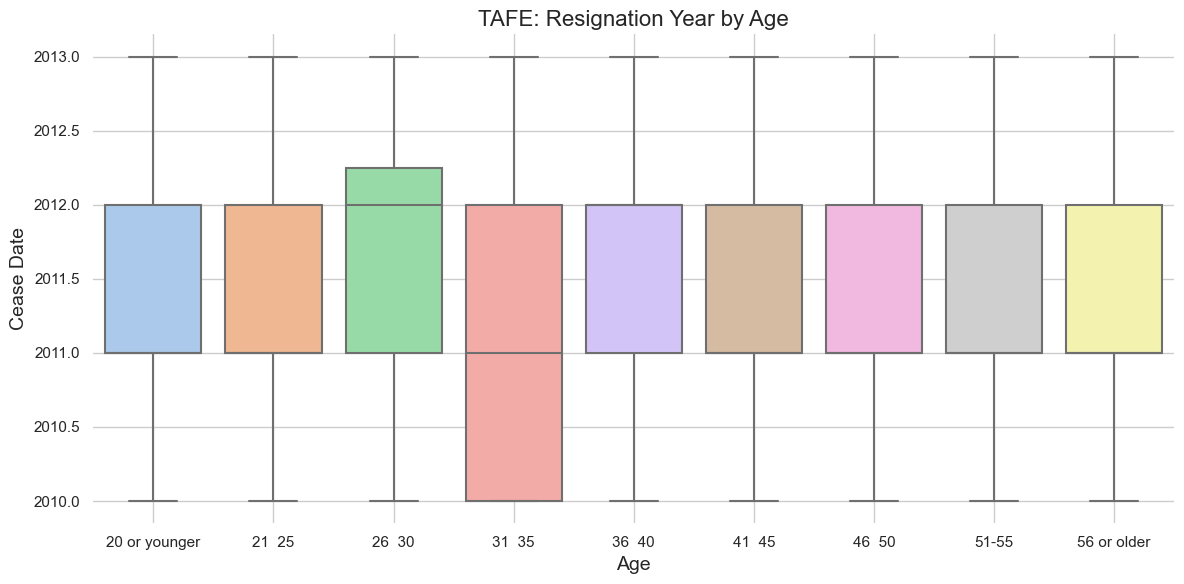

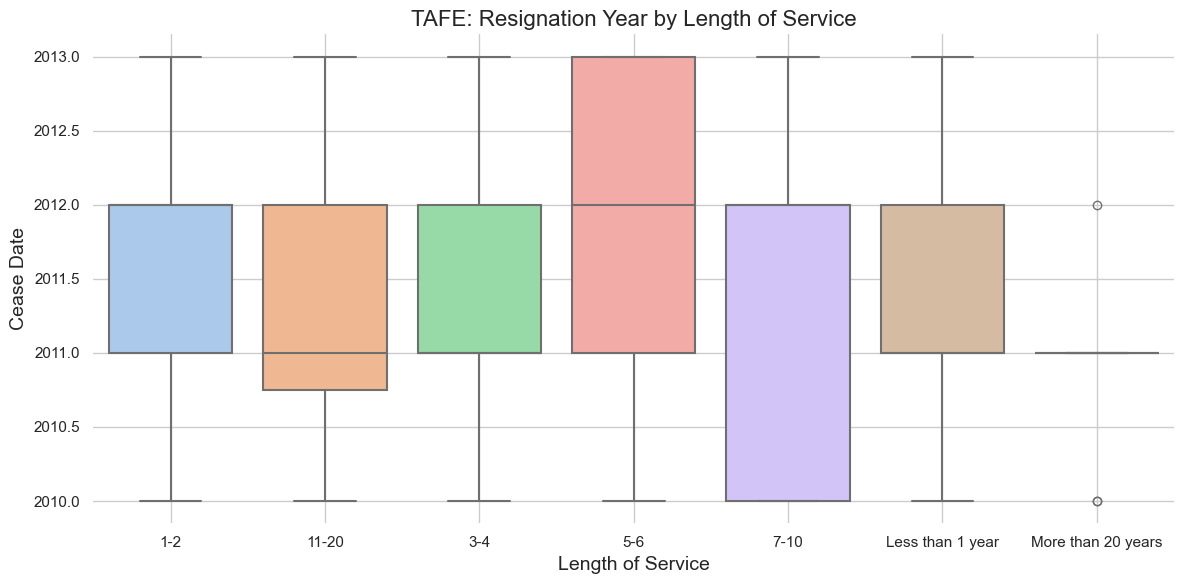

In [20]:
# Filter the dataset to include only rows where 'cease_date' is 2010 or later
tafe_resignations_cleaned = tafe_resignations[tafe_resignations['cease_date'] >= 2010]
tafe_resignations_cleaned = tafe_resignations_cleaned.reset_index(drop=True)

# Create the boxplot for 'cease_date' by 'age'
plt.figure(figsize=(12, 6))
ax1 = sns.boxplot(x='age', 
                  y='cease_date', 
                  data=tafe_resignations_cleaned.sort_values('age'), 
                  linewidth=1.5, 
                  hue='age', 
                  palette=sns.color_palette("pastel", n_colors=9), 
                  legend=False)
ax1.set_title('TAFE: Resignation Year by Age', fontsize=16)
ax1.set_xlabel('Age', fontsize=14)
ax1.set_ylabel('Cease Date', fontsize=14)
plt.grid(True)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# Create the boxplot for 'cease_date' by 'institute_service'
plt.figure(figsize=(12, 6))
ax1 = sns.boxplot(x='institute_service', 
                  y='cease_date', 
                  data=tafe_resignations_cleaned.sort_values('institute_service'), 
                  linewidth=1.5, 
                  hue='institute_service', 
                  palette=sns.color_palette("pastel", n_colors=7), 
                  legend=False)
ax1.set_title('TAFE: Resignation Year by Length of Service', fontsize=16)
ax1.set_xlabel('Length of Service', fontsize=14)
ax1.set_ylabel('Cease Date', fontsize=14)
plt.grid(True)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

### Boxplot Visualization of Resignation Year by Age

I have generated a boxplot to visualize the distribution of resignation years (`cease_date`) by age using the `tafe_resignations` dataset. The dataset was sorted by the `age` column to enhance the clarity of the plot. 

**Observations:**
- The boxplot shows the spread of resignation years across various age groups.
- Outliers are present in the `cease_date` column, particularly for years 2009 and 2010, as indicated by the value counts.

**Handling Outliers:**
- To ensure a cleaner analysis and focus on the primary data, I decided to remove these outliers.
- The updated dataset was then used to generate the final boxplot, which provides a more accurate representation of resignation trends by age.

In [21]:
# Display the shape of the cleaned dete_resignations dataset
print('The shape of the cleaned dete_resignation dataset:', 
      dete_resignations_cleaned.shape)

# Count the number of missing values in 'cease_date' column
print('\nThe number of missing values in the cease_date column:', 
      dete_resignations_cleaned['cease_date'].isnull().sum())

# Count the number of missing values in 'dete_start_date' column
print('\nThe number of missing values in the dete_start_date column:', 
      dete_resignations_cleaned['dete_start_date'].isnull().sum())

# Drop rows where 'dete_start_date' is null to avoid issues in further analysis
dete_resignations_cleaned = dete_resignations_cleaned.dropna(subset=['dete_start_date'])

# Verify that rows with missing 'dete_start_date' have been removed
print('\nThe new shape of the cleaned dete_resignation dataset:', 
      dete_resignations_cleaned.shape)

The shape of the cleaned dete_resignation dataset: (297, 35)

The number of missing values in the cease_date column: 0

The number of missing values in the dete_start_date column: 27

The new shape of the cleaned dete_resignation dataset: (270, 35)


### Data Cleaning for dete_start_date

- During our data preparation, we identified 27 missing values in the `dete_start_date` column, which could potentially impact our analysis, especially when calculating the length of service for employees.

- To address this issue, I removed all rows with null values in the `dete_start_date` column from the `dete_resignations_cleaned` dataset. This ensures that our calculations for employee service length are not compromised by missing data.

In [22]:
# Standardize column capitalization to ensure consistent comparison
dete_upper = dete_resignations_cleaned.apply(lambda x: x.astype(str).str.upper())
tafe_upper = tafe_resignations_cleaned.apply(lambda x: x.astype(str).str.upper())

# Check for any duplicate rows in the standardized datasets
print(dete_resignations_cleaned.duplicated().sum())
print(tafe_resignations_cleaned.duplicated().sum())

0
0


### Duplicate Values Check

To ensure the integrity of our datasets, we performed a check for duplicate entries. We first standardized the capitalization of all columns in both datasets to ensure consistency, which helps in accurately identifying any potential duplicates.

1. **Standardized Capitalization**: 
    - Converting all text data in both `dete_resignations_cleaned` and `tafe_resignations_cleaned` datasets to uppercase ensures that variations in capitalization do not lead to false negatives when checking for duplicates.

2. **Checked for Duplicates**: 
   - No duplicates were found in the `dete_resignations_cleaned` dataset.
   - No duplicates were found in the `tafe_resignations_cleaned` dataset.

In [23]:
# Calculate the length of service for each employee in the 'dete_resignations_cleaned' dataset
# by subtracting the 'dete_start_date' from the 'cease_date'
# Convert the result to integer type to represent years of service as whole numbers
dete_resignations_cleaned['institute_service'] = (
    dete_resignations_cleaned['cease_date'] - 
    dete_resignations_cleaned['dete_start_date']).astype(int)

### Addition of 'Institute Service' Column

To facilitate our analysis of employee tenure and its impact on resignation, we added a new column to the `dete_resignations_cleaned` dataset:

1. **Created 'Institute Service' Column**: We calculated the length of service for each employee by subtracting the `dete_start_date` from the `cease_date`. This new column, named `institute_service`, represents the total number of years an employee worked at the institute.

2. **Purpose**: This new column allows us to analyze the datasets based on the duration of employment, which is crucial for understanding resignation patterns and trends. 

By incorporating this column, we can now better assess how the length of service might influence resignation decisions and perform more insightful analysis on employee tenure.

In [24]:
def update_vals(col):
    """
    Function to convert column values to standardized boolean or NaN values.
    """
    if pd.isnull(col):
        return np.nan  # Return NaN if the value is NaN
    elif col == '-':
        return False  # Convert '-' to False
    else:
        return True  # Convert any other value to True

# Create a copy of the cleaned TAFE dataset to avoid modifying the original
tafe_resignations_up = tafe_resignations_cleaned.copy()

# Define the columns related to job dissatisfaction in the TAFE dataset
tafe_dissatisfaction_cols = ['dissatisfaction',
                             'job_dissatisfaction']

# Apply the update_vals function to the specified columns to standardize values
for col in tafe_dissatisfaction_cols:
    tafe_resignations_up[col] = tafe_resignations_up[col].map(update_vals)

# Create a new 'dissatisfied' column indicating if any dissatisfaction factors are present
tafe_resignations_up['dissatisfied'] = tafe_resignations_up[tafe_dissatisfaction_cols].any(axis='columns')

# Create a copy of the cleaned DETE dataset to avoid modifying the original
dete_resignations_up = dete_resignations_cleaned.copy()

# Define the columns related to job dissatisfaction in the DETE dataset
dete_dissatisfaction_cols = ['job_dissatisfaction',
                             'dissatisfaction_with_the_department',
                             'physical_work_environment',
                             'lack_of_recognition',
                             'lack_of_job_security',
                             'work_location',
                             'employment_conditions',
                             'work_life_balance',
                             'workload']

# Create a new 'dissatisfied' column indicating if any dissatisfaction factors are present
dete_resignations_up['dissatisfied'] = dete_resignations_up[dete_dissatisfaction_cols].any(axis='columns')

### Updates to Dataset Columns

I made several updates to both datasets to better analyze job dissatisfaction:

1. **Standardizing Dissatisfaction Values:**
   - Created a function `update_vals` to convert values:
     - `'-'` to `False`
     - `NaN` to `NaN`
     - Any other value to `True`
   - Applied this function to columns related to dissatisfaction in both TAFE and DETE datasets.

2. **Adding 'Dissatisfied' Column:**
   - Added a new column, `dissatisfied`, to both datasets.
     - In the TAFE dataset, this column is `True` if either 'dissatisfaction' or 'job_dissatisfaction' is `True`.
     - In the DETE dataset, this column is `True` if any of the dissatisfaction-related columns are `True`.

These changes streamline our analysis by providing a clear indicator of whether employees resigned due to dissatisfaction.

In [25]:
# Add an 'institute' column to each dataset to identify the source of the data
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

# Combine the two datasets into one, ensuring all rows are included and resetting the index
combined = pd.concat([dete_resignations_up, tafe_resignations_up],
                     axis=0,                # Stack datasets vertically
                     join='outer',          # Include all columns from both datasets
                     ignore_index=True,     # Reset index in the combined dataset
                     verify_integrity=True) # Ensure no duplicate indices

# Drop columns from the combined dataset that have more than 500 missing values
combined_updated = combined.dropna(thresh=500, axis=1).copy()

### Combining and Cleaning Datasets

1. **Added Institute Column:**
   - Added an `'institute'` column to each dataset to track the source of the data: 'DETE' for the DETE dataset and 'TAFE' for the TAFE dataset.

2. **Combined Datasets:**
   - Merged the DETE and TAFE datasets into a single dataset named `combined`. This allows for a unified analysis of both datasets.
   - Used `pd.concat` with `axis=0` to stack the datasets vertically, `join='outer'` to include all columns, and `ignore_index=True` to reset the index.

3. **Dropped Columns with Excessive Missing Values:**
   - Removed columns from the `combined` dataset where more than 500 values were missing. This helps clean the dataset by removing columns with too many missing entries, which may not be useful for analysis.

These steps consolidate the datasets and ensure that we are working with a cleaner, more manageable dataset.

In [26]:
# Extract numeric characters from 'institute_service' column and convert to float
combined_updated['institute_service'] = (
    combined_updated['institute_service']
    .astype(str)  # Convert values to string to ensure compatibility with extraction
    .str.extract('(\d+)', expand=False)  # Extract numeric values as strings
    .astype(float)  # Convert the extracted strings to float for numerical analysis
)

# Define a function to categorize service length into descriptive categories
def service_map(col):
    if pd.isnull(col):
        return np.nan  # Return NaN if the value is missing
    return (
        'New: Less than 3 years at a company' if col < 3 else
        'Experienced: 3-6 years at a company' if col <= 6 else
        'Established: 7-10 years at a company' if col <= 10 else
        'Veteran: 11 or more years at a company'
    )

# Apply the service_map function to categorize 'institute_service' into service categories
combined_updated['service_cat'] = combined_updated['institute_service'].apply(service_map)

### Data Standardization and Categorization

1. **Standardized 'institute_service':**
   - Extracted numeric values from the `'institute_service'` column to standardize it. This conversion helps in making the service years numerical for better analysis.
   - Converted the extracted numeric strings into floats to facilitate numerical operations.

2. **Categorized Service Length:**
   - Defined a function, `service_map`, to categorize the service length into four descriptive groups:
     - **New**: Less than 3 years
     - **Experienced**: 3-6 years
     - **Established**: 7-10 years
     - **Veteran**: 11 or more years
   - Applied this function to the `'institute_service'` column to create a new column, `'service_cat'`, which categorizes employees based on their years of service.

In [27]:
combined_updated['dissatisfied'].value_counts(dropna=False)

dissatisfied
False    377
True     226
Name: count, dtype: int64

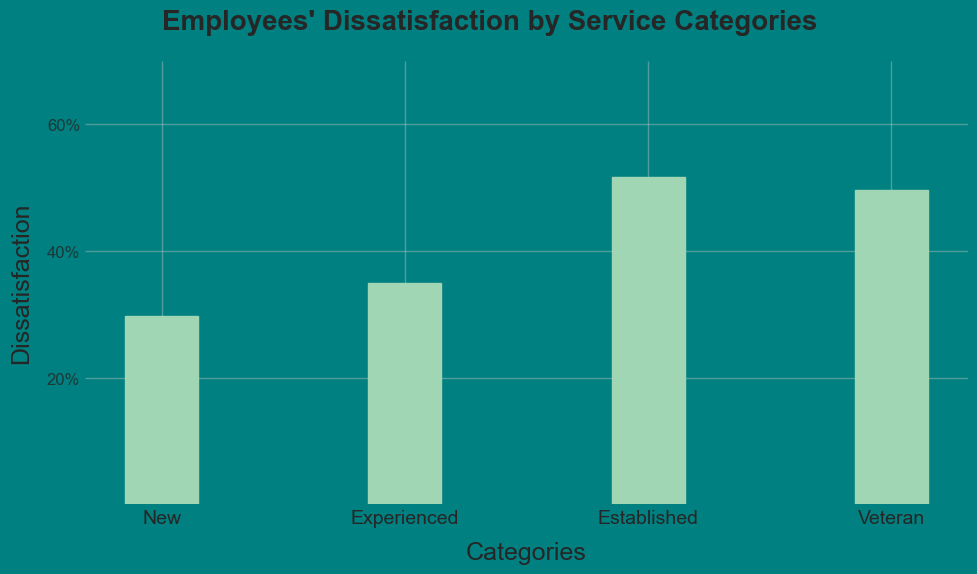

In [28]:
# Create a pivot table to calculate the percentage of dissatisfied employees in each service category
pivot_service = pd.pivot_table(
    combined_updated, 
    values='dissatisfied',  
    index='service_cat'     
)
pivot_service.index.name = 'service_cat'  # Rename the index for clarity
pivot_service.reset_index(inplace=True)   # Reset the index to make 'service_cat' a column

import matplotlib.style as style
style.use('fivethirtyeight')
%matplotlib inline

# Create a bar plot to visualize dissatisfaction by service category
fig, ax = plt.subplots(figsize=(10,6), facecolor='#008080')

# Plot the bar chart
ax.bar(
    pivot_service.reindex(index=[2, 1, 0, 3])['service_cat'],  # Order the categories for plotting
    pivot_service.reindex(index=[2, 1, 0, 3])['dissatisfied'],  # Values to plot
    color = '#a0d6b4',
    edgecolor = '#a0d6b4',
    linewidth = 1,
    width = 0.3
)

# Add title and configure plot aesthetics
ax.text(0, 0.75, 'Employees\' Dissatisfaction by Service Categories', size=20, weight='bold')  # Title
ax.set_facecolor('#008080')  # Set background color of plot area
ax.grid(alpha=0.4)  # Configure grid visibility and transparency

# Hide spines for a cleaner look
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)

# Configure y-axis labels and ticks
ax.set_ylabel('Dissatisfaction', size=18, labelpad=10)
ax.set_ylim(0, .7)
ax.set_yticks([0.2, 0.4, 0.6])
ax.set_yticklabels(['20%', '40%', '60%'], alpha=0.8, size=12)

# Configure x-axis labels and ticks
ax.set_xlabel('Categories', size=18, labelpad=10)
ax.set_xticks(pivot_service.reindex(index=[2, 1, 0, 3])['service_cat'])
ax.set_xticklabels(['New', 'Experienced', 'Established', 'Veteran'], alpha=1, size=14)

plt.tight_layout()  # Adjust layout to fit all elements
plt.show()  # Display the plot

### Data Visualization and Analysis

1. **Pivot Table Creation:**
   - Created a pivot table to calculate the percentage of dissatisfied employees in each service category.
   - The pivot table aggregates the dissatisfaction values and groups them by `service_cat`.

2. **Bar Plot Generation:**
   - Visualized the data using a bar plot with the 'fivethirtyeight' style.
   - The plot illustrates the percentage of dissatisfaction for each service category, helping us to compare dissatisfaction across different lengths of service.

### Analysis of Results:
- **Established (7-10 years):** Highest dissatisfaction at 51.6%.
- **Veteran (11 or more years):** Close to the highest at 49.6%.
- **Experienced (3-6 years):** Moderate dissatisfaction at 34.9%.
- **New (Less than 3 years):** Lowest dissatisfaction at 29.7%.

This bar plot highlights that employees with 7-10 years of service are the most dissatisfied, while those with less than 3 years show the least dissatisfaction. The trend suggests that dissatisfaction might increase with tenure, peaking in the 'Established' category. This insight can help target retention strategies and address employee concerns based on their tenure.

In [29]:
# Drop the 'separationtype' column as it is no longer necessary for analysis
combined_updated.drop(columns=['separationtype'], inplace=True)

# Drop rows with any missing values to ensure completeness of the data
combined_cleaned = combined_updated.dropna(subset=combined_updated.columns.values).copy()

# Group 'employment_status' values into broader categories for clarity
# Assign 'Full-time' to rows containing 'Full'
combined_cleaned.loc[
    (combined_cleaned.apply(lambda r: r.str.contains('Full').any(), axis=1)), 
    'employment_status'] = 'Full-time'

# Assign 'Part-time' to rows containing 'Part'
combined_cleaned.loc[
    (combined_cleaned.apply(lambda r: r.str.contains('Part').any(), axis=1)), 
    'employment_status'] = 'Part-time'

# Assign 'Contract/Casual' to rows containing 'asual'
combined_cleaned.loc[
    (combined_cleaned.apply(lambda r: r.str.contains('asual').any(), axis=1)), 
    'employment_status'] = 'Contract/Casual'

# Clean and group 'age' column into categories
# Extract numeric values from 'age' column and convert to float
combined_cleaned['age'] = (
    combined_cleaned['age']
    .astype(str)  # Ensure compatibility by converting values to string
    .str.extract('(\d+)', expand=False)  # Extract numeric values as strings
    .astype(float)  # Convert extracted strings to float for numerical analysis
)

# Define function to map age into categorical ranges
def age_map(col):
    return (
        '20 or younger' if col <= 20 else
        '21-25' if col <= 25 else
        '26-30' if col <= 30 else
        '31-35' if col <= 35 else
        '36-40' if col <= 40 else
        '41-45' if col <= 45 else
        '46-50' if col <= 50 else
        '51-55' if col <= 55 else
        '56 or older'
    )

# Apply the age mapping function to the 'age' column
combined_cleaned['age'] = combined_cleaned['age'].apply(age_map)

### Data Cleaning and Preparation

1. **Column Removal:**
   - Dropped the `separationtype` column as it was redundant for our analysis since all entries in `combined_updated` are resignations.

2. **Row Filtering:**
   - Removed rows with any missing values to ensure a complete dataset for accurate analysis. This step cleans the data, preventing issues related to missing information.

3. **Employment Status Standardization:**
   - Consolidated various `employment_status` values into broader categories: `Full-time`, `Part-time`, and `Contract/Casual`. This simplification helps in analyzing trends more clearly by reducing the number of unique values and focusing on major employment types.

4. **Age Column Cleaning and Categorization:**
   - Extracted numeric values from the `age` column and converted them into a float format for consistent numerical analysis.
   - Categorized the age into nine groups ranging from '20 or younger' to '56 or older'. This grouping allows for easier comparison and visualization of age-related trends in employee dissatisfaction.

These cleaning steps ensure that the dataset is more manageable and the resulting analysis will be more insightful and focused.

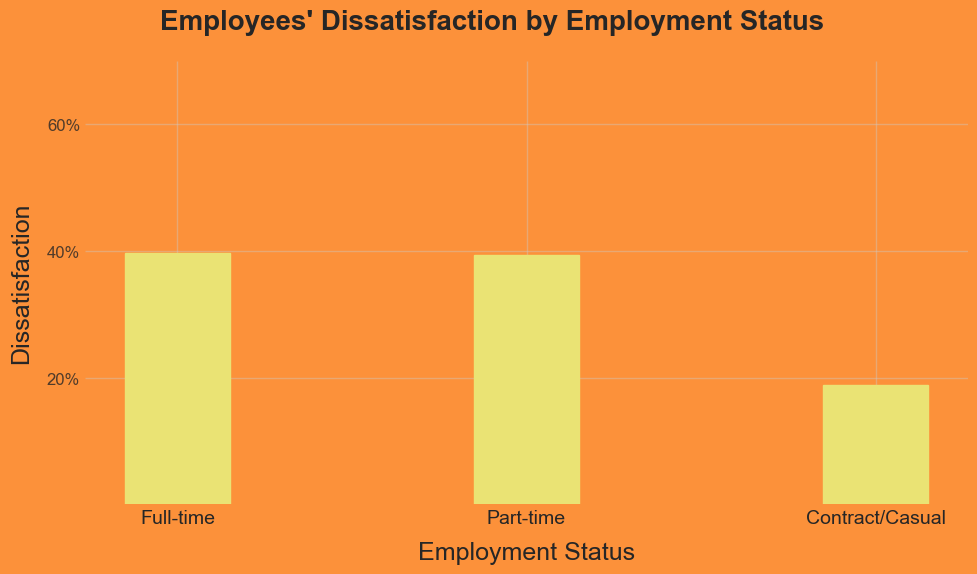

In [30]:
# Generate a pivot table to calculate the percentage of dissatisfied employees by employment status
pivot_status = pd.pivot_table(
    combined_cleaned, 
    values='dissatisfied',
    index='employment_status'
)
pivot_status.index.name = 'employment_status'  # Rename the index for clarity
pivot_status.reset_index(inplace=True)  # Reset the index to make 'employment_status' a column

# Create a figure and axis with specified size and background color
fig, ax = plt.subplots(figsize=(10,6), facecolor='#fc913a')

# Plot a bar chart showing dissatisfaction rates by employment status
ax.bar(
    pivot_status.reindex(index=[1, 2, 0])['employment_status'],  # Order categories as Full-time, Part-time, Contract/Casual
    pivot_status.reindex(index=[1, 2, 0])['dissatisfied'],  # Plot the dissatisfaction percentages
    color='#eae374',
    edgecolor='#eae374',
    linewidth=1,
    width=0.3
)

# Add a title to the plot
ax.text(-0.05, 0.75, 'Employees\' Dissatisfaction by Employment Status', size=20, weight='bold')

# Set background color of the plot area
ax.set_facecolor('#fc913a')

# Configure grid visibility and transparency
ax.grid(alpha=0.4)

# Hide spines for a cleaner appearance
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)

# Configure y-axis labels and ticks
ax.set_ylabel('Dissatisfaction', size=18, labelpad=10)
ax.set_ylim(0, .7)
ax.set_yticks([0.2, 0.4, 0.6])
ax.set_yticklabels(['20%', '40%', '60%'], alpha=0.8, size=12)

# Configure x-axis labels and ticks
ax.set_xlabel('Employment Status', size=18, labelpad=10)
ax.set_xticks(pivot_status.reindex(index=[1, 2, 0])['employment_status'])
ax.set_xticklabels(['Full-time', 'Part-time', 'Contract/Casual'], alpha=1, size=14)

# Adjust layout to fit all elements
plt.tight_layout()
plt.show()  # Display the plot

### Analysis of Employee Dissatisfaction by Employment Status

1. **Data Preparation:**
   - A pivot table was created to calculate the percentage of dissatisfied employees for each employment status category: `Contract/Casual`, `Full-time`, and `Part-time`.

2. **Bar Plot Visualization:**
   - A bar plot was generated to visualize dissatisfaction percentages across these employment status categories.
   - The categories were reordered for clearer comparison: `Full-time`, `Part-time`, and `Contract/Casual`.

3. **Results Analysis:**
   - **Full-time Employees:** Highest dissatisfaction rate at 39.72%.
   - **Part-time Employees:** Slightly lower dissatisfaction rate at 39.38%.
   - **Contract/Casual Employees:** Lowest dissatisfaction rate at 18.75%.

   This visualization highlights that dissatisfaction is relatively high among Full-time and Part-time employees compared to Contract/Casual employees. This insight can be valuable for addressing employee concerns and improving workplace conditions.

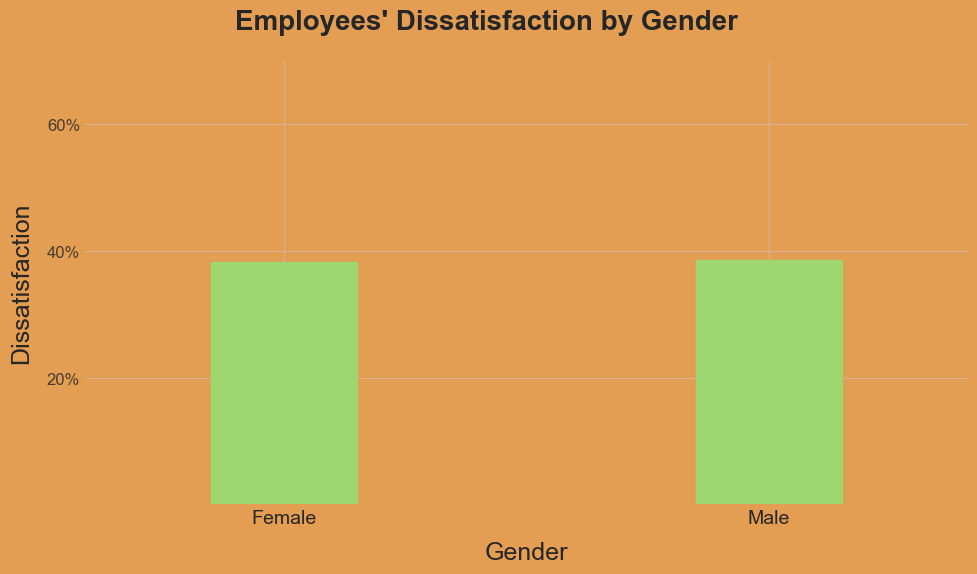

In [31]:
# Generate a pivot table to calculate the percentage of dissatisfied employees by gender
pivot_gender = pd.pivot_table(
    combined_cleaned, 
    values='dissatisfied',
    index='gender'
)
pivot_gender.index.name = 'gender'  # Rename the index for clarity
pivot_gender.reset_index(inplace=True)  # Reset the index to make 'gender' a column

# Create a figure and axis with specified size and background color
fig, ax = plt.subplots(figsize=(10,6), facecolor='#e39e54')

# Plot a bar chart showing dissatisfaction rates by gender
ax.bar(
    pivot_gender['gender'],  # X-axis categories (gender)
    pivot_gender['dissatisfied'],  # Y-axis values (dissatisfaction percentage)
    color='#9ed670',
    edgecolor='#9ed670',
    linewidth=1,
    width=0.3
)

# Add a title to the plot
ax.text(-0.1, 0.75, 'Employees\' Dissatisfaction by Gender', size=20, weight='bold')

# Set background color of the plot area
ax.set_facecolor('#e39e54')

# Configure grid visibility and transparency
ax.grid(alpha=0.4)

# Hide spines for a cleaner appearance
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)

# Configure margins to add spacing around the bars
ax.margins(0.2)

# Configure y-axis labels and ticks
ax.set_ylabel('Dissatisfaction', size=18, labelpad=10)  
ax.set_ylim(0, .7)  
ax.set_yticks([0.2, 0.4, 0.6])  
ax.set_yticklabels(['20%', '40%', '60%'], alpha=0.8, size=12)

# Configure x-axis labels and ticks
ax.set_xlabel('Gender', size=18, labelpad=10)  
ax.set_xticks(pivot_gender['gender']) 
ax.set_xticklabels(['Female', 'Male'], alpha=1, size=14)

# Adjust layout to fit all elements
plt.tight_layout()
plt.show()  # Display the plot

### Analysis of Employee Dissatisfaction by Gender

1. **Data Preparation:**
   - A pivot table was created to calculate the percentage of dissatisfied employees based on gender, resulting in two categories: `Female` and `Male`.

2. **Bar Plot Visualization:**
   - A bar plot was generated to visualize dissatisfaction rates by gender, with bars representing the dissatisfaction percentages for each gender category.

3. **Results Analysis:**
   - **Female Employees:** Dissatisfaction rate is approximately 38.30%.
   - **Male Employees:** Dissatisfaction rate is approximately 38.61%.

   The dissatisfaction rates are very similar for both genders, with males showing a slightly higher rate than females. This indicates that gender does not significantly influence employee dissatisfaction based on this dataset.

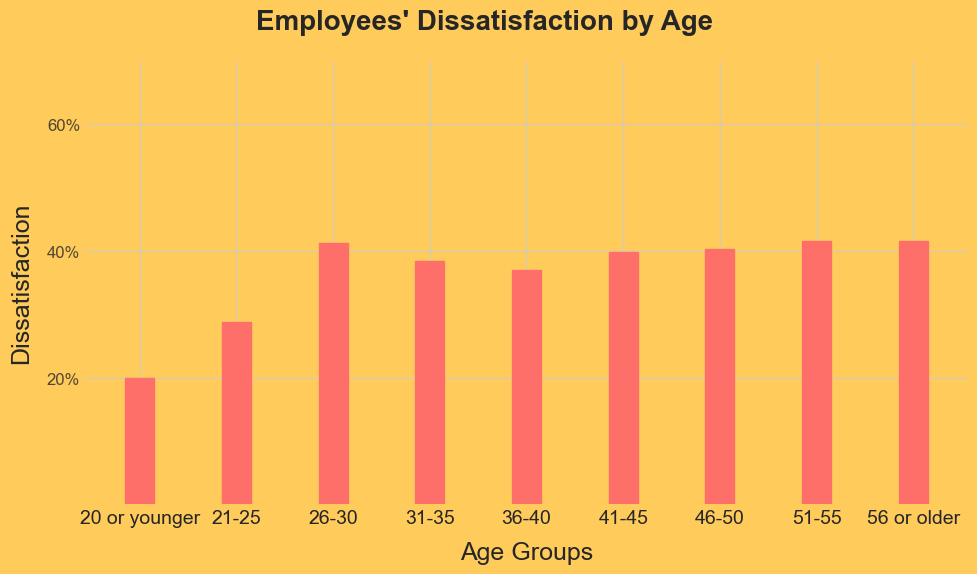

In [32]:
# Generate a pivot table to calculate the percentage of dissatisfied employees by age group
pivot_age = pd.pivot_table(
    combined_cleaned, 
    values='dissatisfied',
    index='age'
)
pivot_age.index.name = 'age'  # Rename the index for clarity
pivot_age.reset_index(inplace=True)  # Reset the index to make 'age' a column

# Create a figure and axis with specified size and background color
fig, ax = plt.subplots(figsize=(10,6), facecolor='#ffcc5c')

# Plot a bar chart showing dissatisfaction rates by age group
ax.bar(
    pivot_age['age'],  # X-axis categories (age groups)
    pivot_age['dissatisfied'],  # Y-axis values (dissatisfaction percentage)
    color='#ff6f69',
    edgecolor='#ff6f69',
    linewidth=1,
    width=0.3
)

# Add a title to the plot
ax.text(1.2, 0.75, 'Employees\' Dissatisfaction by Age', size=20, weight='bold')

# Set background color of the plot area
ax.set_facecolor('#ffcc5c')

# Configure grid visibility and transparency
ax.grid(alpha=0.7)

# Hide spines for a cleaner appearance
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)

# Configure y-axis labels and ticks
ax.set_ylabel('Dissatisfaction', size=18, labelpad=10)
ax.set_ylim(0, .7)
ax.set_yticks([0.2, 0.4, 0.6])
ax.set_yticklabels(['20%', '40%', '60%'], alpha=0.8, size=12)

# Configure x-axis labels and ticks
ax.set_xlabel('Age Groups', size=18, labelpad=10)
ax.set_xticks(pivot_age['age'])
ax.set_xticklabels(pivot_age['age'].tolist(), alpha=1, size=14)

# Adjust layout to fit all elements
plt.tight_layout()
plt.show()  # Display the plot

### Analysis of Employee Dissatisfaction by Age Group

1. **Data Preparation:**
   - A pivot table was created to calculate the percentage of dissatisfied employees within each age group.

2. **Bar Plot Visualization:**
   - A bar plot was generated to visualize dissatisfaction rates across different age groups.

3. **Results Analysis:**
   - **20 or younger:** Dissatisfaction rate is 20%.
   - **21-25:** Dissatisfaction rate is 28.81%.
   - **26-30:** Dissatisfaction rate is 41.27%.
   - **31-35:** Dissatisfaction rate is 38.33%.
   - **36-40:** Dissatisfaction rate is 36.92%.
   - **41-45:** Dissatisfaction rate is 39.77%.
   - **46-50:** Dissatisfaction rate is 40.28%.
   - **51-55:** Dissatisfaction rate is 41.54%.
   - **56 or older:** Dissatisfaction rate is 41.54%.

   The dissatisfaction rates generally increase with age, peaking in the 51-55 and 56 or older groups. This suggests that older employees may experience higher levels of dissatisfaction, which could be related to various factors such as job tenure or changes in job expectations over time.

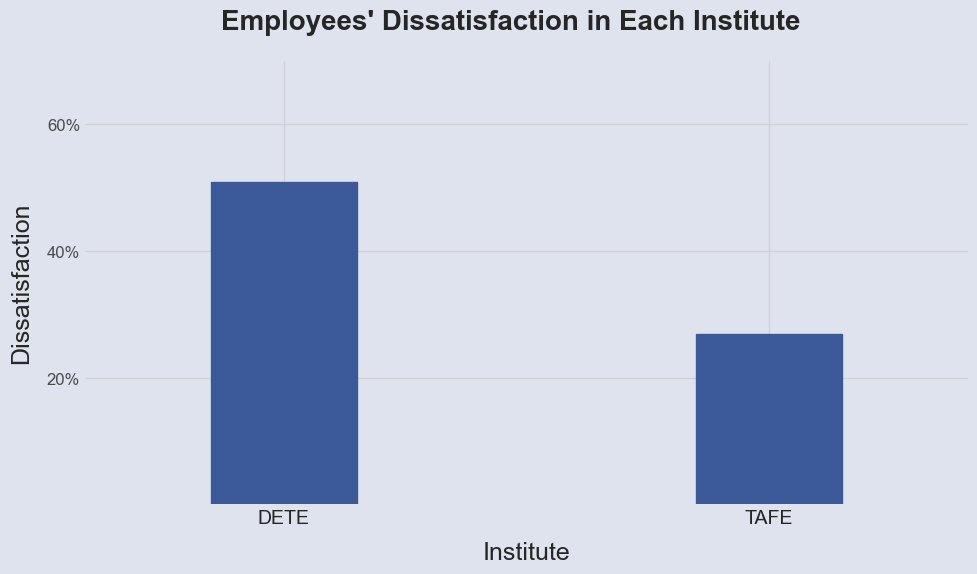

In [33]:
# Generate a pivot table to calculate the percentage of dissatisfied employees by institute
pivot_institute = pd.pivot_table(
    combined_cleaned, 
    values='dissatisfied',
    index='institute'
)
pivot_institute.index.name = 'institute'  # Rename the index for clarity
pivot_institute.reset_index(inplace=True)  # Reset the index to make 'institute' a column

# Create a figure and axis with specified size and background color
fig, ax = plt.subplots(figsize=(10,6), facecolor='#dfe3ee')

# Plot a bar chart showing dissatisfaction rates by institute
ax.bar(
    pivot_institute['institute'],  # X-axis categories (institutes)
    pivot_institute['dissatisfied'],  # Y-axis values (dissatisfaction percentage)
    color='#3b5998',
    edgecolor='#3b5998',
    linewidth=1,
    width=0.3
)

# Add a title to the plot
ax.text(-0.13, 0.75, 'Employees\' Dissatisfaction in Each Institute', size=20, weight='bold')

# Set background color of the plot area
ax.set_facecolor('#dfe3ee')

# Configure grid visibility and transparency
ax.grid(alpha=0.7)
ax.margins(0.2)

# Hide spines for a cleaner appearance
for location in ['left', 'right', 'top', 'bottom']:
    ax.spines[location].set_visible(False)

# Configure y-axis labels and ticks
ax.set_ylabel('Dissatisfaction', size=18, labelpad=10)
ax.set_ylim(0, .7)
ax.set_yticks([0.2, 0.4, 0.6])
ax.set_yticklabels(['20%', '40%', '60%'], alpha=0.8, size=12)

# Configure x-axis labels and ticks
ax.set_xlabel('Institute', size=18, labelpad=10)
ax.set_xticks(pivot_institute['institute'])
ax.set_xticklabels(pivot_institute['institute'].tolist(), alpha=1, size=14)

# Adjust layout to fit all elements
plt.tight_layout()
plt.show()  # Display the plot

### Analysis of Employee Dissatisfaction by Institute

1. **Data Preparation:**
   - A pivot table was created to calculate the percentage of dissatisfied employees for each institute (DETE and TAFE).

2. **Bar Plot Visualization:**
   - A bar plot was generated to visualize the dissatisfaction rates between the two institutes.

3. **Results Analysis:**
   - **DETE:** The dissatisfaction rate is 50.96%.
   - **TAFE:** The dissatisfaction rate is 26.92%.

   The results indicate that employees from DETE have a significantly higher dissatisfaction rate compared to those from TAFE. This suggests that there may be underlying issues or differences in the work environment or organizational practices between the two institutes that contribute to higher levels of employee dissatisfaction at DETE.

## Conclusion

In this project, we aimed to uncover key insights into employee dissatisfaction and resignation patterns by comparing datasets from DETE and TAFE. We analyzed the factors contributing to dissatisfaction and explored how these varied across different employee demographics and institutional contexts.

The analysis revealed notable differences in dissatisfaction rates between the two institutes, with DETE employees exhibiting higher levels of dissatisfaction compared to their TAFE counterparts. Additionally, dissatisfaction was found to be influenced by factors such as employment status and age. These findings provide valuable insights for organizations looking to address employee dissatisfaction and improve retention strategies.